<a href="https://colab.research.google.com/github/srikanth7615/SRI/blob/main/ML_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
data= pd.read_csv('data.csv')



In [8]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Rest of your code here...



In [9]:
# Check data types of each column
print(data.dtypes)

# If there are non-numeric columns, you may need to encode them
# For example, if 'Diagnosis' column is categorical ('M' or 'B'), you can encode it
# Assuming 'Diagnosis' is the only non-numeric column in this case
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Accuracy: 0.956140350877193
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



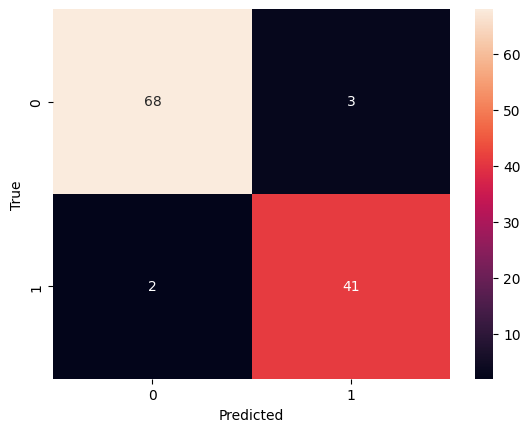

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



# Step 2: Load the Dataset
# Assuming you've already loaded the dataset as 'data'

# Step 3: Data Preprocessing
X = data.drop(["id", "diagnosis"], axis=1)
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
# It's important to scale the features before applying SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.impute import SimpleImputer
# Step 4: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score  # Import accuracy_score

# Assuming the dataset 'data' and other preprocessing steps are defined


from sklearn.feature_selection import VarianceThreshold

# Remove features with zero variance
variance_threshold = VarianceThreshold()
X_train_selected = variance_threshold.fit_transform(X_train_imputed)
X_test_selected = variance_threshold.transform(X_test_imputed)

# Step 5: Train the SVM Model
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
svm_classifier.fit(X_train_imputed, y_train)

# Step 6: Evaluate the Model
y_pred = svm_classifier.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy using accuracy_score
print("Accuracy:", accuracy)

# Print classification report and confusion matrix as before
from sklearn.metrics import classification_report



print("Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns



conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
